# Setup

In [1]:
#! pip install mplhep > /dev/null
#! pip install zfit > /dev/null

In [2]:
# Following https://stackoverflow.com/a/64604031
# Importing python libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import sys
from pathlib import Path
from matplotlib._api import check_in_list
import pickle
import os
import tensorflow as tf
# Importing sympy to make calculations:
import sympy

from pathlib import Path

from math import pi
from numpy import cos, sin

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[1] / "py")

if module_path not in sys.path:
    sys.path.append(module_path)

2024-02-19 20:06:59.683145: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-19 20:06:59.720564: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-19 20:06:59.721561: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-19 20:07:00.436947: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import plot_tools
import zfit
import customPDFs
import SLSQPv2 as SLSQP_zfit

/home/carlos/.local/lib/python3.8/site-packages/zfit/__init__.py:63: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


# Integral calculations

## Verifying norm of the integral

In [ ]:
def transformation(FL, AFB, S39, thetaK, thetaL, phi):
    # The parameters S_3 and S_9 have been reduced to S_d u c e d   t9
  sum = 9/(16*pi)*(((3/4)*(1-FL)*(sin(thetaK))**2
        + FL*cos(thetaK)**2)
        + (1/4)*(1-FL)*sin(thetaK)**2 * cos(2*thetaL)
        - FL * cos(thetaK)**2 * cos(2*thetaL)
        + S39*sin(thetaK)**2 * sin(thetaL)**2 * cos(2*phi)
        + (4/3) * AFB * sin(thetaK)**2 * cos(thetaL) )
  return sum

In [4]:
# Defining the ranges of the variables for integration

x_range = (-1, 1)
y_range = (-1, 1)
z_range = (-1, 1)
phi_range = (0, pi) # changed the range

In [5]:
x, y, phi = sympy.symbols('c_k c_l phi', real = True)
F_L, A_FB, S = sympy.symbols('F_L, A, S', real = True, constant = True)

In [6]:
pdf_func = 9/(16*pi)*((3/4)*(1-F_L)*(1-x**2) + F_L*x**2 \
          + (1/4)*(1-F_L)*(1-x**2)*(2*y**2-1) \
          - F_L*x**2*(2*y**2-1) \
          + S*(1-x**2)*(1-y**2)*sympy.cos(2*phi) \
          + (4/3)*A_FB*(1-x**2)*y )

In [7]:
integral = sympy.integrate(pdf_func, x, y, phi)
integral

c_l**3*(-0.0298415518297304*F_L*c_k**3*phi - 0.0298415518297304*F_L*c_k*phi + 0.00994718394324346*S*c_k**3*sin(2*phi) - 0.0298415518297304*S*c_k*sin(2*phi) - 0.00994718394324346*c_k**3*phi + 0.0298415518297304*c_k*phi) + c_l**2*phi*(-0.0397887357729738*A*c_k**3 + 0.119366207318922*A*c_k) + c_l*(0.149207759148652*F_L*c_k**3*phi - 0.0895246554891911*F_L*c_k*phi - 0.0298415518297304*S*c_k**3*sin(2*phi) + 0.0895246554891911*S*c_k*sin(2*phi) - 0.0298415518297304*c_k**3*phi + 0.0895246554891911*c_k*phi)

In [8]:
print(integral)

c_l**3*(-0.0298415518297304*F_L*c_k**3*phi - 0.0298415518297304*F_L*c_k*phi + 0.00994718394324346*S*c_k**3*sin(2*phi) - 0.0298415518297304*S*c_k*sin(2*phi) - 0.00994718394324346*c_k**3*phi + 0.0298415518297304*c_k*phi) + c_l**2*phi*(-0.0397887357729738*A*c_k**3 + 0.119366207318922*A*c_k) + c_l*(0.149207759148652*F_L*c_k**3*phi - 0.0895246554891911*F_L*c_k*phi - 0.0298415518297304*S*c_k**3*sin(2*phi) + 0.0895246554891911*S*c_k*sin(2*phi) - 0.0298415518297304*c_k**3*phi + 0.0895246554891911*c_k*phi)


In [9]:
definite_int = sympy.integrate(pdf_func, (x,x_range[0],x_range[1]), (y,y_range[0],y_range[1]), (phi,phi_range[0],phi_range[1]))
definite_int.evalf()

1.74393424900432e-16*F_L - 3.89817183251938e-17*S + 1.0

# Partial integrals calculation

In [10]:
integral_cosk = sympy.integrate(pdf_func, x)

In [11]:
print(integral_cosk)

c_k**3*(-0.0795774715459477*A*c_l - 0.0895246554891911*F_L*c_l**2 + 0.149207759148652*F_L + 0.0596831036594608*S*c_l**2*cos(2*phi) - 0.0596831036594608*S*cos(2*phi) - 0.0298415518297304*c_l**2 - 0.0298415518297304) + c_k*(0.238732414637843*A*c_l - 0.0895246554891911*F_L*c_l**2 - 0.0895246554891911*F_L - 0.179049310978382*S*c_l**2*cos(2*phi) + 0.179049310978382*S*cos(2*phi) + 0.0895246554891911*c_l**2 + 0.0895246554891911)


In [12]:
integral_cosl = sympy.integrate(pdf_func, y)

In [13]:
print(integral_cosl)

c_l**3*(-0.0895246554891911*F_L*c_k**2 - 0.0298415518297304*F_L + 0.0596831036594608*S*c_k**2*cos(2*phi) - 0.0596831036594608*S*cos(2*phi) - 0.0298415518297304*c_k**2 + 0.0298415518297304) + c_l**2*(-0.119366207318922*A*c_k**2 + 0.119366207318922*A) + c_l*(0.447623277445956*F_L*c_k**2 - 0.0895246554891911*F_L - 0.179049310978382*S*c_k**2*cos(2*phi) + 0.179049310978382*S*cos(2*phi) - 0.0895246554891911*c_k**2 + 0.0895246554891911)


In [14]:
integral_phi = sympy.integrate(pdf_func, phi)

In [15]:
print(integral_phi)

0.238732414637843*A*c_l*phi*(1 - c_k**2) - 0.179049310978382*F_L*c_k**2*phi*(2*c_l**2 - 1) + 0.179049310978382*F_L*c_k**2*phi + 0.0895246554891911*S*(1 - c_k**2)*(1 - c_l**2)*sin(2*phi) + 0.179049310978382*phi*(0.25 - 0.25*F_L)*(1 - c_k**2)*(2*c_l**2 - 1) + 0.179049310978382*phi*(0.75 - 0.75*F_L)*(1 - c_k**2)


# Variables and constants config

In [16]:
# Number of points along each parameter axis to evaluate the PDF at
linsp_size_AFB = 21
linsp_size_FL = 21
linsp_size_S39 = 13

# Search range for the value of the parameters
afb_range = [-1,1]
fl_range = [-0.1,0.4]
s39_range = [-0.6,0.6]

# Numpy array over which plotting and evaluating happens
AFB_np = np.linspace(afb_range[0], afb_range[1], linsp_size_AFB)
FL_np = np.linspace(fl_range[0], fl_range[1], linsp_size_FL)
S39_np = np.linspace(s39_range[0], s39_range[1], linsp_size_S39)

In [17]:
# Mesh to plot the whole PDF

cosThetaK_np = np.linspace(-1, 1, 10)
#x_np = np.zeros(100)
cosThetaL_np = np.linspace(-1, 1, 10)
#y_np = np.zeros(100)
# Changed the range of phi to the whole integration region
phi_np = np.linspace(0, pi, 10)
#phi_np = np.ones(100) * pi/4

complete_space_list = []
for i in cosThetaK_np:
    for j in cosThetaL_np:
        for k in phi_np:
            item = (i,j,k)
            complete_space_list.append(item)
    #print(len(complete_space_list))

complete_space_np = np.array(complete_space_list).reshape(len(cosThetaK_np),len(cosThetaL_np),len(phi_np), 3)

# Zfit configuration

In [18]:
## Observables

cosThetaK = zfit.Space('cosThetaK', [-1,1], axes=0)
cosThetaL = zfit.Space('cosThetaL', [-1,1], axes=1)
phi = zfit.Space('phi', [0, pi], axes=2)

# Defining the ranges of the variables of the observable space

combined_obs = zfit.dimension.combine_spaces(cosThetaK,cosThetaL,phi)

In [19]:
phi.axes

(2,)

In [20]:
combined_obs = combined_obs.with_axes([0,1,2])

In [21]:
combined_obs.axes

(0, 1, 2)

In [22]:
## Parameters

AFB = zfit.Parameter('AFB', 0)
FL = zfit.Parameter('FL', 0) # Changing the parameters just outside the allowed region
S39 = zfit.Parameter('S39', 0)

In [139]:
version =  zfit.__version__.split('.')
if int(version[1])>=5:
    from zfit import z
else:
    from zfit import ztf as z

class decayWidth(zfit.pdf.BasePDF):
    '''
    Decay B^0 -> K^{*0} \mu^+ \mu^-
    Funciona directamente con el parámetro de phi
    '''
    _PARAMS = ['FL', 'AFB', 'S39']

    def __init__(self, FL, AFB, S39, obs, name="angular_dist" ):
        # se debe definir los parametros a pasar a la pdf
        params = {
              'FL': FL,
              'AFB': AFB,
              'S39': S39}
        super().__init__(obs, params, name=name )#FL=FL, AFB=AFB, S3=S3, S9=S9) # params


    def _unnormalized_pdf(self, x):
        #print(x)
        #print(type(x))
        cosThetaK, cosThetaL, phi = z.unstack_x(x)

        #cos2phi = tf.math.cos(2*phi)

        FL = self.params['FL']
        AFB = self.params['AFB']
        S3 = self.params['S39']

        cosK2 = cosThetaK*cosThetaK
        cosL2 = cosThetaL*cosThetaL

        pdf = (3/4)*(1-FL)*(1-cosK2)
        pdf += FL*cosK2
        pdf += (1/4)*(1-FL)*(1-cosK2)*(2*cosL2-1)
        pdf += - FL*cosK2*(2*cosL2-1)
        pdf += S39*(1-cosK2)*(1-cosL2)*tf.math.cos(2*phi) 
        pdf += (4/3)*AFB*(1-cosK2)*cosThetaL
        #pdf += (4/3)*AFB*(1-cosK2)*cosL2 Este coseno de theta_L no debe llevar ^2
        pdf = pdf*9/(16*pi)

        return pdf
        
        

In [24]:
# Analytic integral for the PDF function in each variable
#def an_int_ck(ck, cl, phi, AFB, FL, S39):
def an_int_ck(x, limits, norm_range, params, model):
    cosThetaK, cosThetaL, phi = z.unstack_x(x)

    FL = self.params['FL']
    AFB = self.params['AFB']
    S39 = self.params['S39']
    
    integral = cosThetaK**3*(-0.0795774715459477*AFB*cosThetaL 
            - 0.0895246554891911*FL*cosThetaL**2 
            + 0.149207759148652*FL 
            + 0.0596831036594608*S39*cosThetaL**2**tf.math.cos(2*phi) 
            - 0.0596831036594608*S39**tf.math.cos(2*phi) 
            - 0.0298415518297304*cosThetaL**2 
            - 0.0298415518297304) 
    + cosThetaK*(0.238732414637843*AFB*cosThetaL 
           - 0.0895246554891911*FL*cosThetaL**2 
           - 0.0895246554891911*FL 
           - 0.179049310978382*S39*cosThetaL**2**tf.math.cos(2*phi) 
           + 0.179049310978382*S39**tf.math.cos(2*phi) 
           + 0.0895246554891911*cosThetaL**2 
           + 0.0895246554891911)
    return integral

#params = {'AFB': AFB, 'FL': FL, 'S39': S39}

In [25]:
def an_int_cl(x, limits, norm_range, params, model):
    cosThetaK, cosThetaL, phi = z.unstack_x(x)

    FL = self.params['FL']
    AFB = self.params['AFB']
    S39 = self.params['S39']
    
    integral = cosThetaL**3*(-0.0895246554891911*FL*cosThetaK**2 
                       - 0.0298415518297304*FL 
                       + 0.0596831036594608*S39*cosThetaK**2*tf.math.cos(2*phi) 
                       - 0.0596831036594608*S39*tf.math.cos(2*phi) 
                       - 0.0298415518297304*cosThetaK**2 
                       + 0.0298415518297304) 
    + cosThetaL**2*(-0.119366207318922*AFB*cosThetaK**2 
              + 0.119366207318922*AFB) 
    + cosThetaL*(0.447623277445956*FL*cosThetaK**2 
           - 0.0895246554891911*FL 
           - 0.179049310978382*S39*cosThetaK**2*tf.math.cos(2*phi) 
           + 0.179049310978382*S39*tf.math.cos(2*phi) 
           - 0.0895246554891911*cosThetaK**2 
           + 0.0895246554891911)
    return integral

In [26]:
def an_int_phi(x, limits, norm_range, params, model):
    cosThetaK, cosThetaL, phi = z.unstack_x(x)

    FL = self.params['FL']
    AFB = self.params['AFB']
    S39 = self.params['S39']
    
    integral = 0.238732414637843*AFB*cosThetaL*phi*(1 - cosThetaK**2) 
    - 0.179049310978382*FL*cosThetaK**2*phi*(2*cosThetaL**2 - 1) 
    + 0.179049310978382*FL*cosThetaK**2*phi 
    + 0.0895246554891911*S39*(1 - cosThetaK**2)*(1 - cosThetaL**2)*tf.math.sin(2*phi) 
    + 0.179049310978382*phi*(0.25 - 0.25*FL)*(1 - cosThetaK**2)*(2*cosThetaL**2 - 1) 
    + 0.179049310978382*phi*(0.75 - 0.75*FL)*(1 - cosThetaK**2)
    
    return integral

In [27]:
def total_integral(cosThetaK, cosThetaL, phi, AFB, FL, S39):

    integral = cosThetaL**3*(-0.0298415518297304*FL*cosThetaK**3*phi 
                       - 0.0298415518297304*FL*cosThetaK*phi 
                       + 0.00994718394324346*S39*cosThetaK**3*tf.math.sin(2*phi) 
                       - 0.0298415518297304*S39*cosThetaK*tf.math.sin(2*phi) 
                       - 0.00994718394324346*cosThetaK**3*phi 
                       + 0.0298415518297304*cosThetaK*phi) 
    + cosThetaL**2*phi*(-0.0397887357729738*AFB*cosThetaK**3 
                  + 0.119366207318922*AFB*cosThetaK) 
    + cosThetaL*(0.149207759148652*FL*cosThetaK**3*phi 
           - 0.0895246554891911*FL*cosThetaK*phi 
           - 0.0298415518297304*S39*cosThetaK**3*tf.math.sin(2*phi) 
           + 0.0895246554891911*S39*cosThetaK*tf.math.sin(2*phi) 
           - 0.0298415518297304*cosThetaK**3*phi 
           + 0.0895246554891911*cosThetaK*phi)
    
    return integral

In [28]:
combined_obs.limits

(array([[-1., -1.,  0.]]), array([[1.        , 1.        , 3.14159265]]))

In [29]:
def analytic_integral(x, limits, norm_range, params, model):
    fl = params['FL']
    afb = params['AFB']
    s39 = params['S39']

    lower, upper = limits.limits
    lower = lower[0]
    upper = upper[0]

    integral = total_integral(upper[0], upper[1], upper[2], afb, fl, s39) - total_integral(lower[0], lower[1], lower[2], afb, fl, s39)
    print("Integral called")
    return integral
    

In [30]:
cosThetaL.axes

(1,)

In [31]:
limits_param = ([zfit.Space.ANY, zfit.Space.ANY, zfit.Space.ANY], [zfit.Space.ANY, zfit.Space.ANY, zfit.Space.ANY])
integral_limits = zfit.Space(axes=(0,1,2), limits = limits_param)
#integral_limits = integral_limits.with_limits([()])

In [32]:
# decayWidth.register_analytic_integral(
#     an_int_ck, cosThetaK
# )
# decayWidth.register_analytic_integral(
#     an_int_cl, cosThetaL
# )
# decayWidth.register_analytic_integral(
#     an_int_phi, p-hi
# )
# define the space over which it is defined. Here, we use the axes


decayWidth.register_analytic_integral(
    analytic_integral, integral_limits, #supports_multiple_limits=True
)

In [33]:
AFB.set_value(0)
FL.set_value(0.4) # Changing the parameters just outside the allowed region
S39.set_value(0)

In [34]:
decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit

In [35]:
#integral_analytic = decay_rate.integrate(limits=[(-1, -1, 0),(1,1,pi)])

In [36]:
# Creating an instance of the PDF
dr_pdf = decay_rate.pdf(complete_space_np)

<zfit.Data: Data obs=('cosThetaK', 'cosThetaL', 'phi')>
<class 'zfit.core.data.Data'>
Integral called


In [37]:
res_norm = decay_rate.normalization(combined_obs)
res_norm

Integral called


<tf.Tensor: shape=(), dtype=float64, numpy=-0.012499999999999997>

In [38]:
def evaluate_validity_pdf(pdf):
    valid_pdf = True
    complete_space_list = []
    for i, _i in enumerate(cosThetaK_np):
        for j, _j in enumerate(cosThetaL_np):
            for k, _k in enumerate(phi_np):
                if pdf[i,j,k].numpy() < 0:
                    print(f"PDF invalid at")
                    print(f"cosThetaK[{i}] = {_i}")
                    print(f"cosThetaL[{j}] = {_j}")
                    print(f"phi[{k}] = {_k}")
                    print(f'value = {pdf[i,j,k].numpy()}')
                    valid_pdf = False
                    break
            if not valid_pdf:
                break
        if not valid_pdf:
            break
    return valid_pdf

In [39]:
evaluate_validity_pdf(dr_pdf)

PDF invalid at
cosThetaK[0] = -1.0
cosThetaL[1] = -0.7777777777777778
phi[0] = 0.0
value = -4.5270739368361355


False

In [40]:
valid_res = evaluate_validity_pdf(dr_pdf)

PDF invalid at
cosThetaK[0] = -1.0
cosThetaL[1] = -0.7777777777777778
phi[0] = 0.0
value = -4.5270739368361355


In [41]:
valid_res

False

In [42]:
valid_points_FL = []
valid_points_AFB = []

In [43]:
def calculating_valid_pdfs(s39_val):
    s39_str = "{:.2f}".format(s39_val)
    path = f'np_arrays/afb_{afb_range[0]}_{afb_range[1]}_fl_{fl_range[0]}_{fl_range[1]}_s39-{s39_str}.npy'
    if not os.path.isfile(path):
        valid_list = []
        S39.set_value(s39_val)
        for i, afb_ in enumerate(AFB_np):
            AFB.set_value(afb_)
            for j, fl_ in enumerate(FL_np):
                FL.set_value(fl_)
                decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit
                dr_pdf = decay_rate.pdf(complete_space_np)
                valid_list.append(evaluate_validity_pdf(dr_pdf))
        valid_np = np.array(valid_list).reshape(len(AFB_np), len(FL_np))
        np.save(f'np_arrays/afb_{afb_range[0]}_{afb_range[1]}_fl_{fl_range[0]}_{fl_range[1]}_s39-{s39_str}.npy', valid_np)
    else: 
        valid_np = np.load(path)
        #print(valid_np)

    valid_points_FL = []
    valid_points_AFB = []
    valid_coordinates = []
    
    for i, vnp_afb in enumerate(valid_np):
        for j, vnp_fl in enumerate(vnp_afb):
            if vnp_fl==True:
                valid_points_FL.append(FL_np[j])
                valid_points_AFB.append(AFB_np[i])
                valid_coordinates.append((AFB_np[i], FL_np[j], s39_val))
    # Plotting
    plt.figure(figsize=(5,5))
    plt.scatter(valid_points_AFB, valid_points_FL)
    plt.axis((afb_range[0], afb_range[1], fl_range[0], fl_range[1]))
    plt.xlabel('$A_{FB}$')
    plt.ylabel('$F_L$')
    plt.title('$S_{39}='+str(s39_val)+'$')
    plt.savefig(f'afb_{afb_range[0]}_{afb_range[1]}_fl_{fl_range[0]}_{fl_range[1]}_s39-{s39_str}.png')
    plt.show()

    return valid_coordinates 

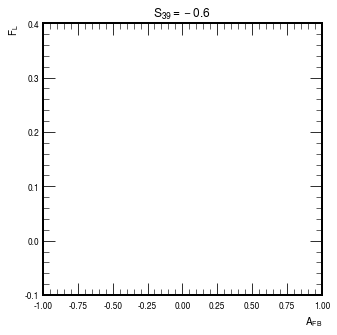

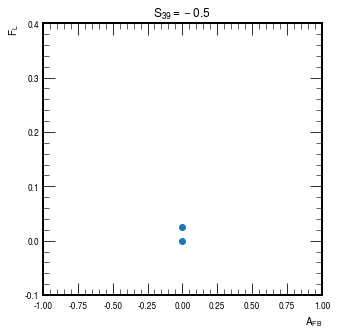

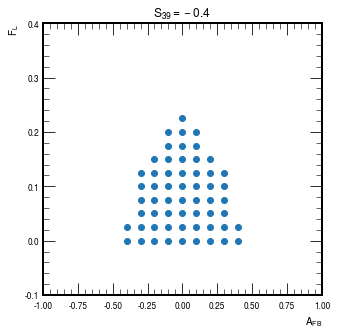

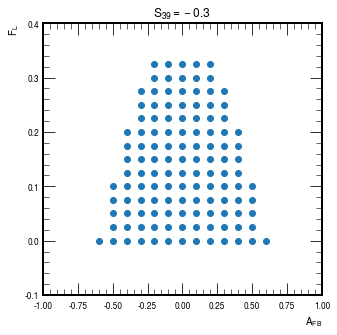

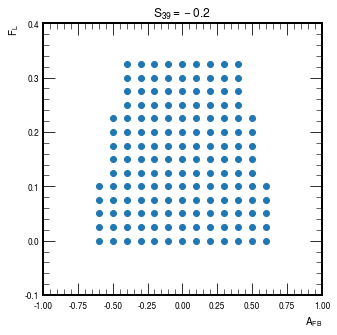

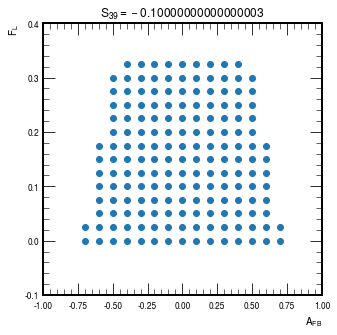

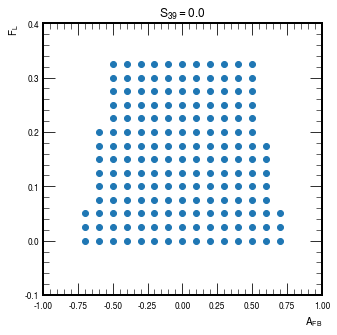

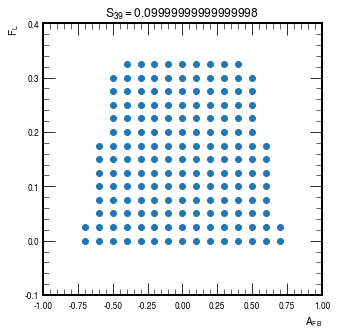

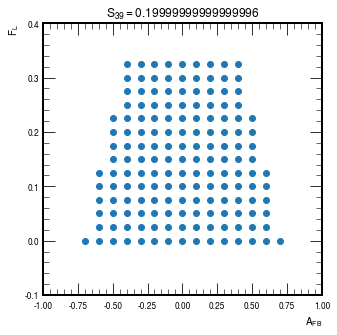

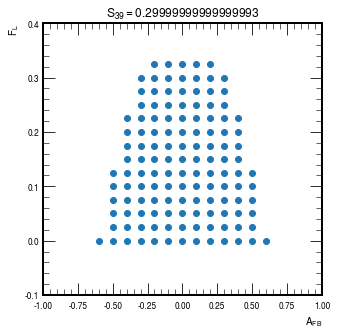

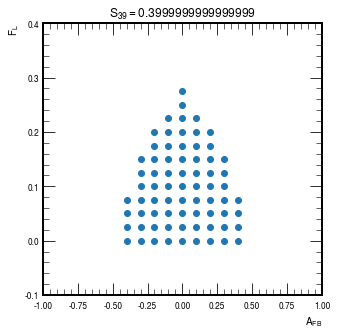

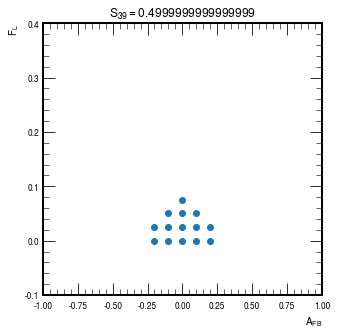

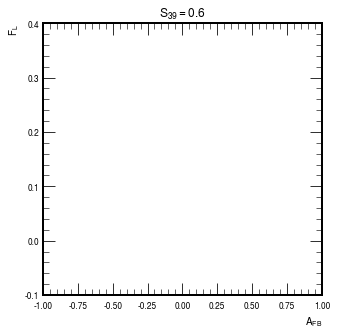

--- 4.365410566329956 seconds ---


In [44]:
start_time = time.time()
valid_coordinates = []
for s39 in S39_np:
    valid_coordinates += calculating_valid_pdfs(s39)
#calculating_valid_pdfs(S39_np[2])
print("--- %s seconds ---" % (time.time() - start_time))

In [45]:
valid_coordinates

[(0.0, 0.0, -0.5),
 (0.0, 0.024999999999999994, -0.5),
 (-0.3999999999999999, 0.0, -0.4),
 (-0.3999999999999999, 0.024999999999999994, -0.4),
 (-0.29999999999999993, 0.0, -0.4),
 (-0.29999999999999993, 0.024999999999999994, -0.4),
 (-0.29999999999999993, 0.05000000000000002, -0.4),
 (-0.29999999999999993, 0.07500000000000001, -0.4),
 (-0.29999999999999993, 0.1, -0.4),
 (-0.29999999999999993, 0.125, -0.4),
 (-0.19999999999999996, 0.0, -0.4),
 (-0.19999999999999996, 0.024999999999999994, -0.4),
 (-0.19999999999999996, 0.05000000000000002, -0.4),
 (-0.19999999999999996, 0.07500000000000001, -0.4),
 (-0.19999999999999996, 0.1, -0.4),
 (-0.19999999999999996, 0.125, -0.4),
 (-0.19999999999999996, 0.15, -0.4),
 (-0.09999999999999998, 0.0, -0.4),
 (-0.09999999999999998, 0.024999999999999994, -0.4),
 (-0.09999999999999998, 0.05000000000000002, -0.4),
 (-0.09999999999999998, 0.07500000000000001, -0.4),
 (-0.09999999999999998, 0.1, -0.4),
 (-0.09999999999999998, 0.125, -0.4),
 (-0.099999999999999

In [46]:
S39.set_value(-0.5)
AFB.set_value(-0.8)
FL.set_value(-0.8)
decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit
dr_pdf = decay_rate.pdf(complete_space_np)
print(evaluate_validity_pdf(dr_pdf))


<zfit.Data: Data obs=('cosThetaK', 'cosThetaL', 'phi')>
<class 'zfit.core.data.Data'>
Integral called
PDF invalid at
cosThetaK[0] = -1.0
cosThetaL[1] = -0.7777777777777778
phi[0] = 0.0
value = -0.5325969337454272
False


## Plotting in 3D the constraints

In [47]:
valid_coordinates_np = np.array(valid_coordinates)
#valid_coordinates_np[:,2]

In [48]:
#!pip install ipympl

In [49]:
%matplotlib widget

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

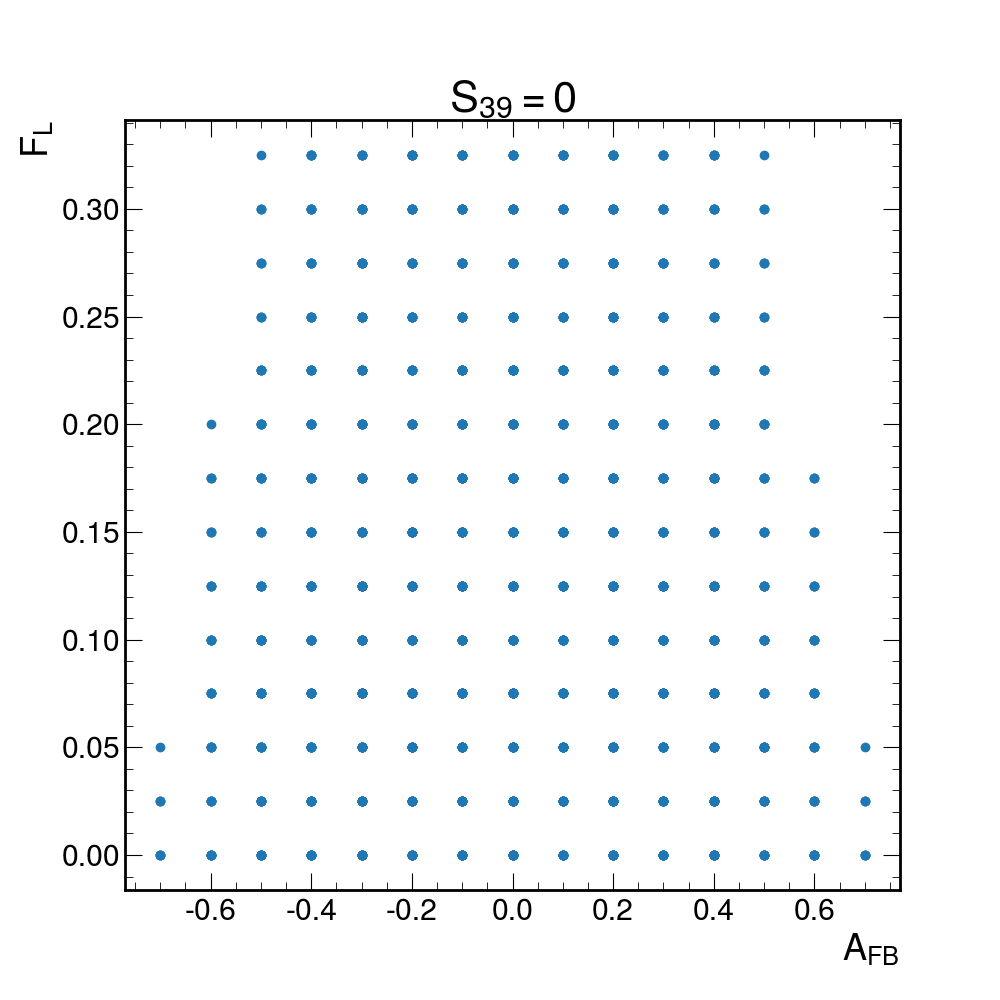

In [50]:
fig = plt.figure()
plt.scatter(valid_coordinates_np[:,0], valid_coordinates_np[:,1])
plt.ylabel('$F_{L}$')
plt.xlabel('$A_{FB}$')
plt.title('$S_{39}=0$')
plt.plot

Text(0.5, 1.0, '$F_{L}=0$')

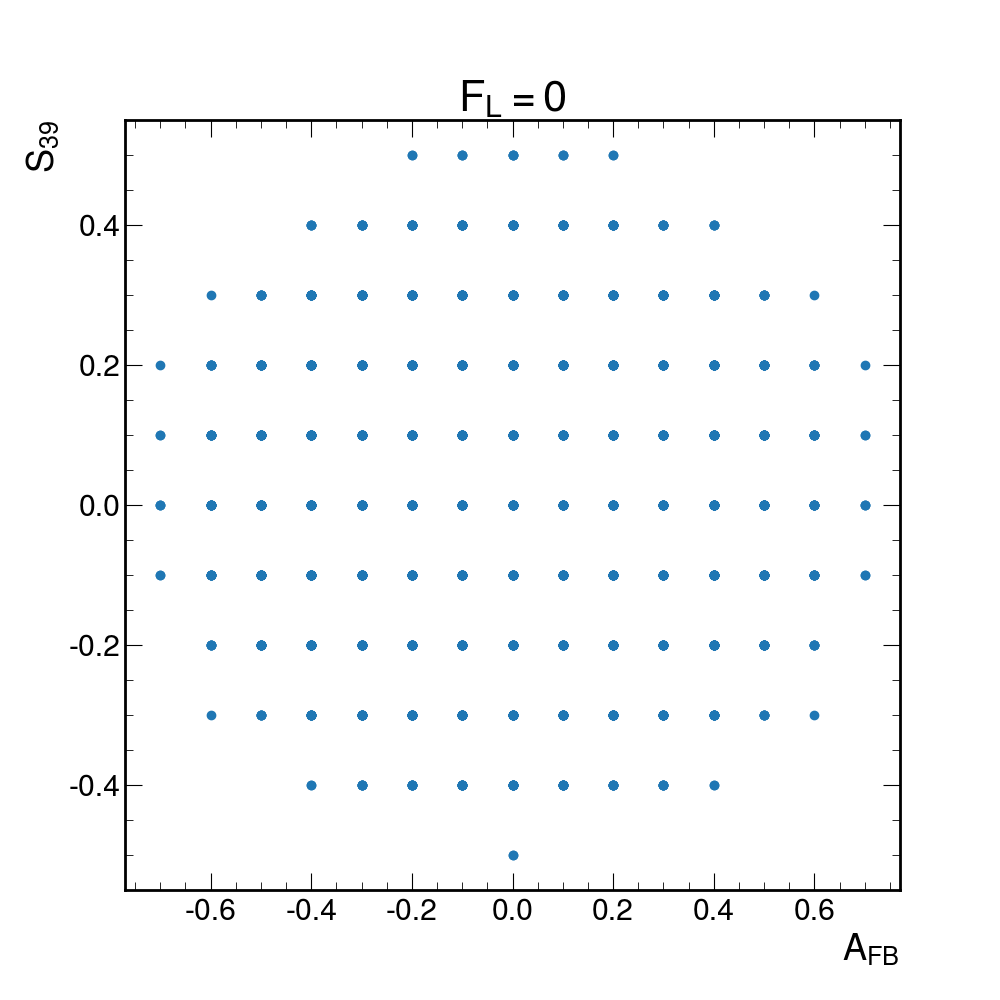

In [51]:
fig = plt.figure()
plt.scatter(valid_coordinates_np[:,0], valid_coordinates_np[:,2])
plt.xlabel('$A_{FB}$')
plt.ylabel('$S_{39}$')
plt.title('$F_{L}=0$')

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

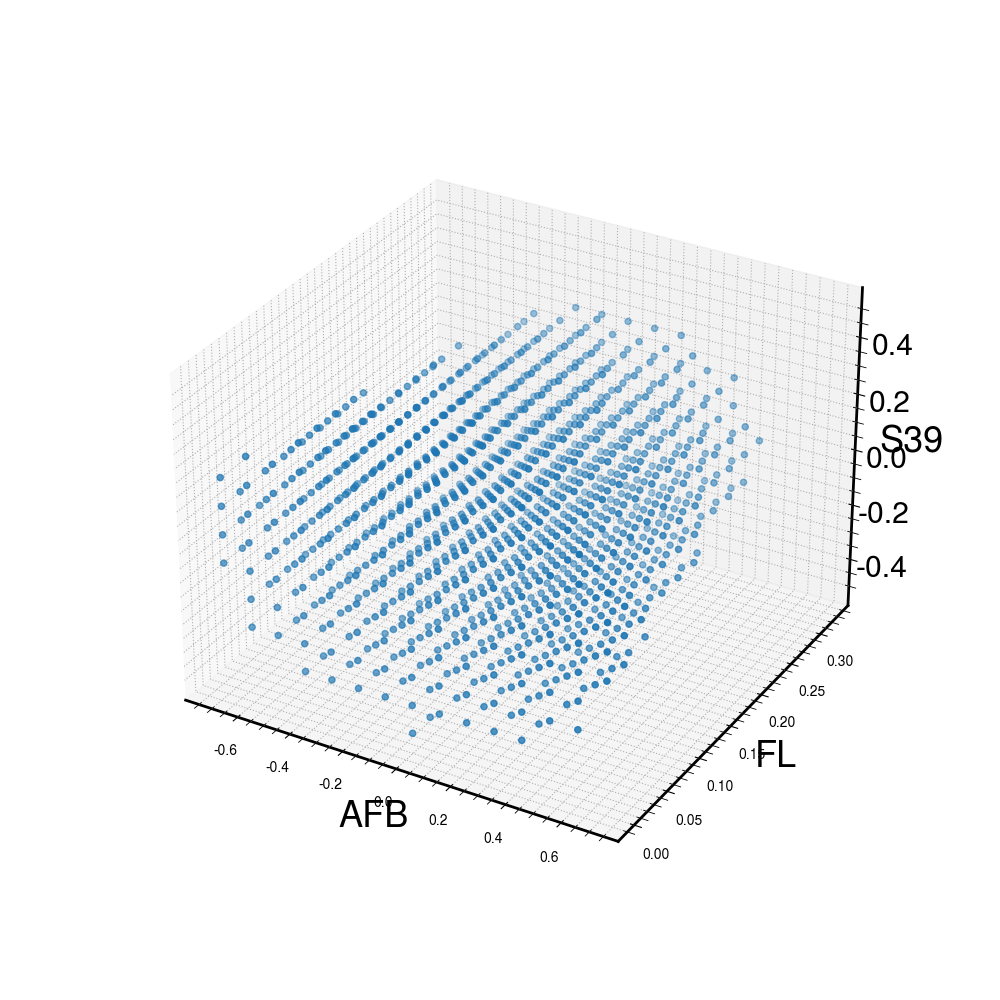

In [154]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(valid_coordinates_np[:,0], valid_coordinates_np[:,1], valid_coordinates_np[:,2], marker='o')

ax.set_xlabel('AFB')
ax.set_ylabel('FL')
ax.set_zlabel('S39')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [152]:
# Defining a function for the possible values
def f(x,y):
    z = np.sqrt(16*x**2/9 + 4*y**2)-1
    return z
u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j]
x = 0.75*np.cos(u)*np.sin(v)
y = 0.5*np.sin(u)*np.sin(v)
z = -f(x, y)

In [54]:
x

array([[0.00000000e+00, 2.37959501e-02, 4.75679397e-02, ...,
        4.75679397e-02, 2.37959501e-02, 9.18485099e-17],
       [0.00000000e+00, 2.37480412e-02, 4.74721701e-02, ...,
        4.74721701e-02, 2.37480412e-02, 9.16635892e-17],
       [0.00000000e+00, 2.36045073e-02, 4.71852468e-02, ...,
        4.71852468e-02, 2.36045073e-02, 9.11095715e-17],
       ...,
       [0.00000000e+00, 2.36045073e-02, 4.71852468e-02, ...,
        4.71852468e-02, 2.36045073e-02, 9.11095715e-17],
       [0.00000000e+00, 2.37480412e-02, 4.74721701e-02, ...,
        4.74721701e-02, 2.37480412e-02, 9.16635892e-17],
       [0.00000000e+00, 2.37959501e-02, 4.75679397e-02, ...,
        4.75679397e-02, 2.37959501e-02, 9.18485099e-17]])

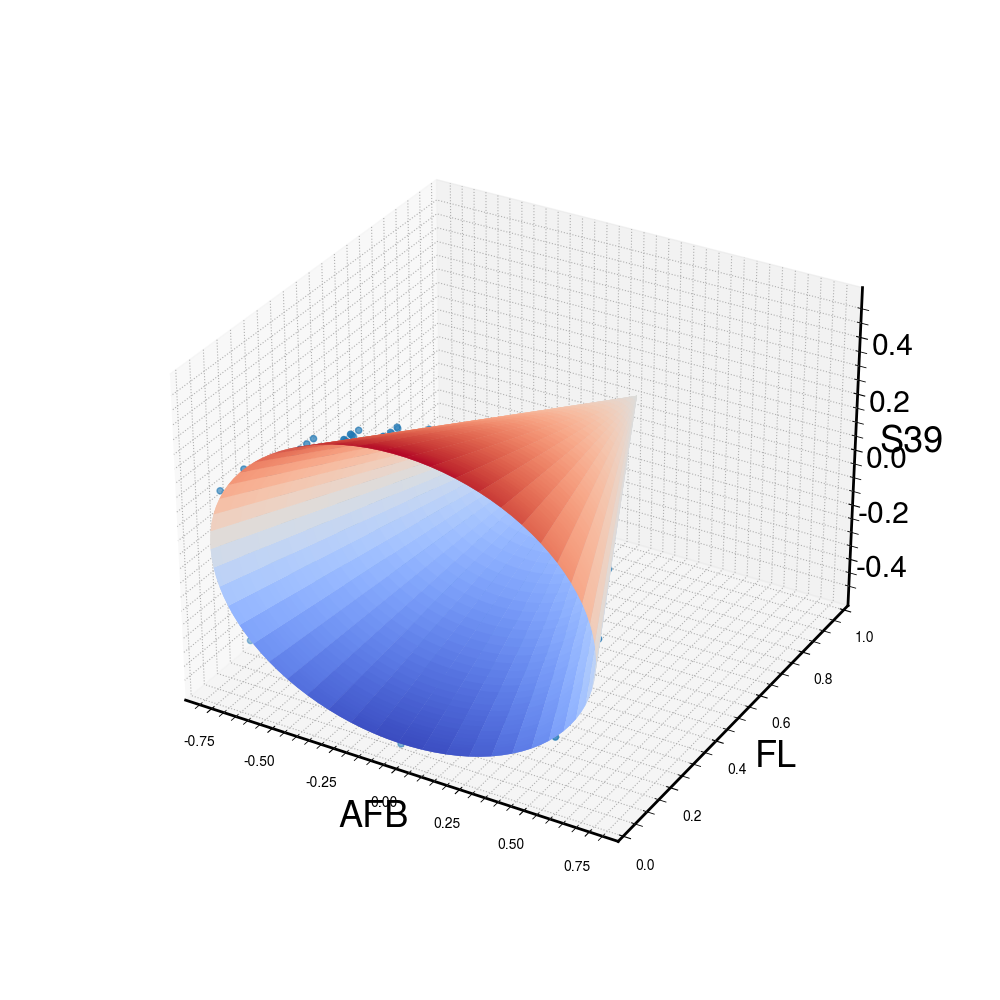

In [153]:
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(valid_coordinates_np[:,0], valid_coordinates_np[:,1], valid_coordinates_np[:,2], marker='o')

ax.set_xlabel('AFB')
ax.set_ylabel('FL')
ax.set_zlabel('S39')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.plot_surface(x, z, y, cmap=cm.coolwarm)
ax.set_ylim([0, 1])
plt.show()

In [130]:
plt.close()

# Tests for restrictions

In [141]:
from numpy.random import seed
from numpy.random import rand

In [142]:
# Generating random numbers
fl_rand = 0.4*rand(1000)

In [143]:
fl_min_1 = []
for val in fl_rand:
    fl_min_1.append((val-1)**2)

In [144]:
def cone_restriction(x):
    flag = True
    values = []
    sum = 0
    while flag:
        afb = 1.5*rand()-0.75
        s39 = rand() - 0.5
        sum = (16*afb**2/9) + (4*s39**2)
        if sum <= x:
            values = [afb, s39]
            flag = False
    return values

In [145]:
test_points = []
for i, fl_ in enumerate(fl_min_1):
    afb_, s39_ = cone_restriction(fl_)
    test_points.append([afb_, fl_rand[i], s39_])
test_points = np.array(test_points)

In [146]:
#test_points

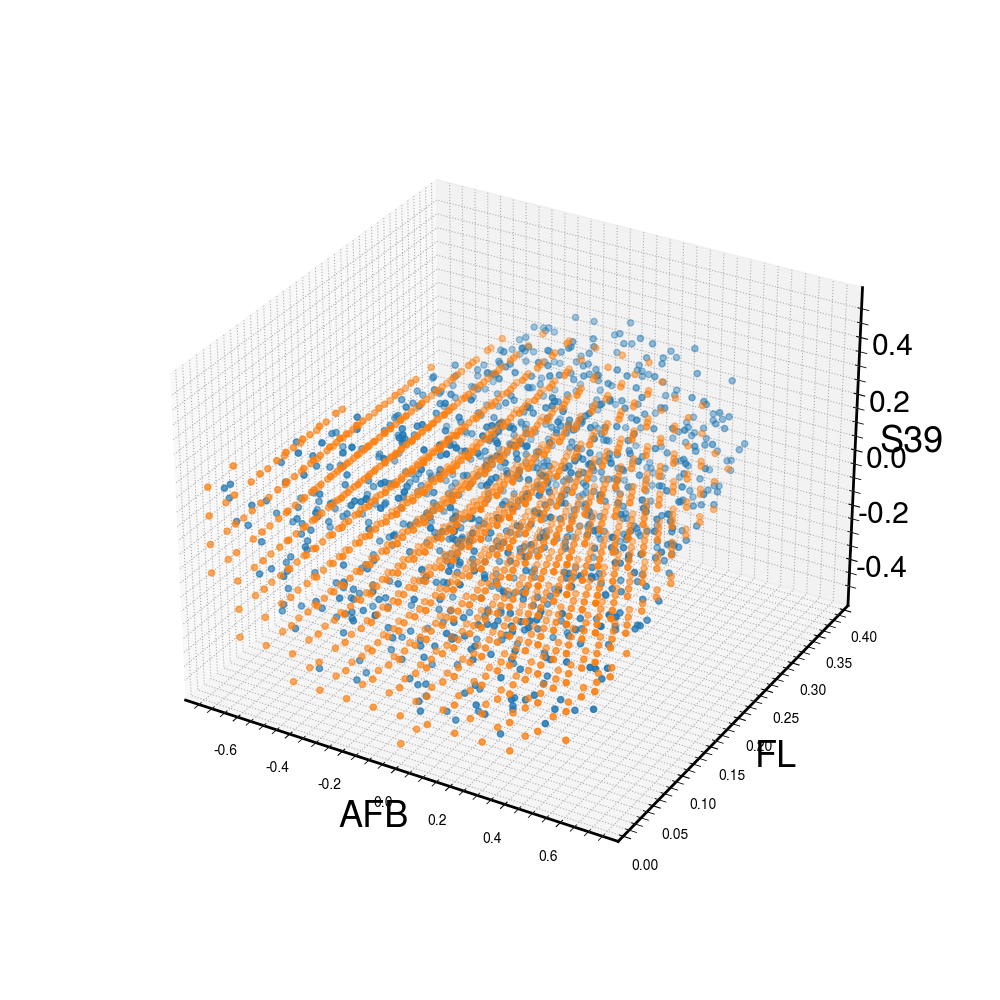

In [147]:
# Testing with random
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.set_xlabel('AFB')
ax.set_ylabel('FL')
ax.set_zlabel('S39')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#ax.plot_surface(x, -z, y, cmap=cm.hot, ec='k')
ax.set_ylim([0, 0.4])
ax.scatter(test_points[:,0], test_points[:,1], test_points[:,2], marker='o')
ax.scatter(valid_coordinates_np[:,0], valid_coordinates_np[:,1], valid_coordinates_np[:,2], marker='o')
plt.show()

In [148]:
valid_test_points = []
for test_point in test_points:
    AFB.set_value(test_point[0])
    FL.set_value(test_point[1])
    S39.set_value(test_point[2])
    decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit
    dr_pdf = decay_rate.pdf(complete_space_np)
    result = evaluate_validity_pdf(dr_pdf)
    if not result:
        print(f"(AFB, FL, S39) = ({test_point[0]}, {test_point[1]}, {test_point[2]}) No es válido")
    valid_test_points.append(result)

Estimated integral error ( 3.2454686671010409e-06 ) larger than tolerance ( 3e-06 ), which is maybe not enough (but maybe it's also fine). You can (best solution) implement an anatytical integral (see examples in repo) or manually set a higher number on the PDF with 'update_integration_options' and increase the 'max_draws' (or adjust 'tol'). If partial integration is chosen, this can lead to large memory consumption.This is a new warning checking the integral accuracy. It may warns too often as it is Work In Progress. If you have any observation on it, please tell us about it: https://github.com/zfit/zfit/issues/new/chooseTo suppress this warning, use zfit.settings.set_verbosity(-1).
Estimated integral error ( 3.794139924312433e-06 ) larger than tolerance ( 3e-06 ), which is maybe not enough (but maybe it's also fine). You can (best solution) implement an anatytical integral (see examples in repo) or manually set a higher number on the PDF with 'update_integration_options' and increase

In [150]:
bool_arr = np.array(valid_test_points, dtype='bool') 
bool_arr.sum()

1000